### Transforming Non-Stationary IPL Time Series Data to Stationary Data


### 1. Generating the Dataset

#### 1.1 Dataset Description

We will create a synthetic time series dataset representing the total runs scored in each IPL match over multiple seasons.

##### -Time Frame: 10 IPL seasons, 60 matches per season.
##### -Variables:
 ##### -Date: Date of each match.
 ##### -Total_Runs: Total runs scored in the match.

### 1.2 Data Generation Process

In [524]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
# Normalize the runs for better performance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [526]:
df= pd.read_csv('all_season_details .csv',low_memory=False)
import warnings
warnings.filterwarnings("ignore")

In [527]:
virat_df = df[df['batsman1_name'] == 'Virat Kohli']

In [528]:
virat_season_runs = virat_df.groupby('season')['runs'].sum()

In [529]:
if isinstance(virat_season_runs, pd.Series):
    virat_season_runs = virat_season_runs.reset_index()

In [530]:
virat_season_runs['season'] = pd.to_datetime(virat_season_runs['season'], format='%Y')
print(virat_season_runs)

       season  runs
0  2008-01-01   187
1  2009-01-01   258
2  2010-01-01   316
3  2011-01-01   584
4  2012-01-01   375
5  2013-01-01   655
6  2014-01-01   373
7  2015-01-01   519
8  2016-01-01   998
9  2017-01-01   314
10 2018-01-01   539
11 2019-01-01   472
12 2020-01-01   477
13 2021-01-01   423
14 2022-01-01   362
15 2023-01-01   661


### 2.Visualizing the Data

##### 2.1 Plotting the Time Series

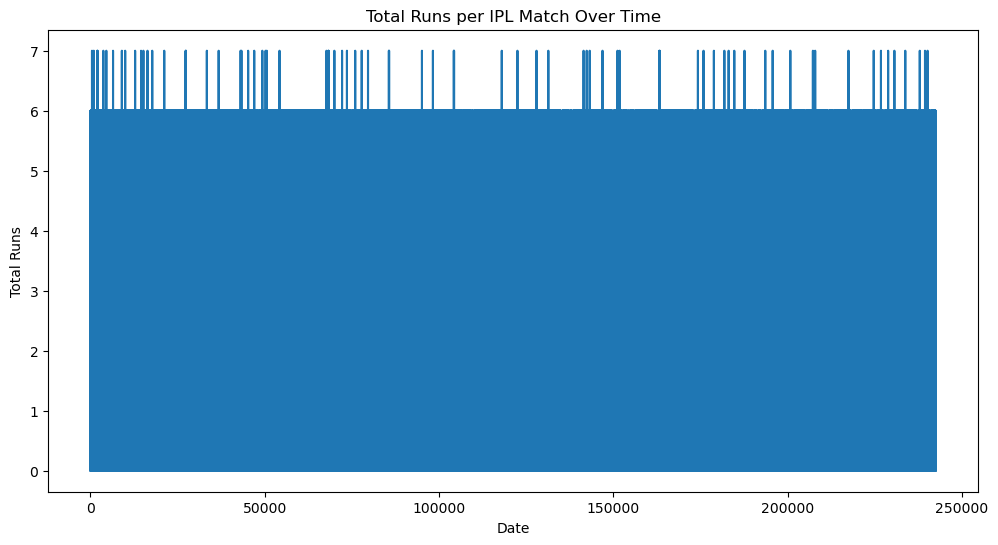

In [533]:
plt.figure(figsize=(12, 6))
plt.plot(df['runs'])
plt.title('Total Runs per IPL Match Over Time')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.show()


The plot shows an upward trend with seasonal fluctuations, indicating non-stationarity.

### 2.2 Histogram and Density Plot

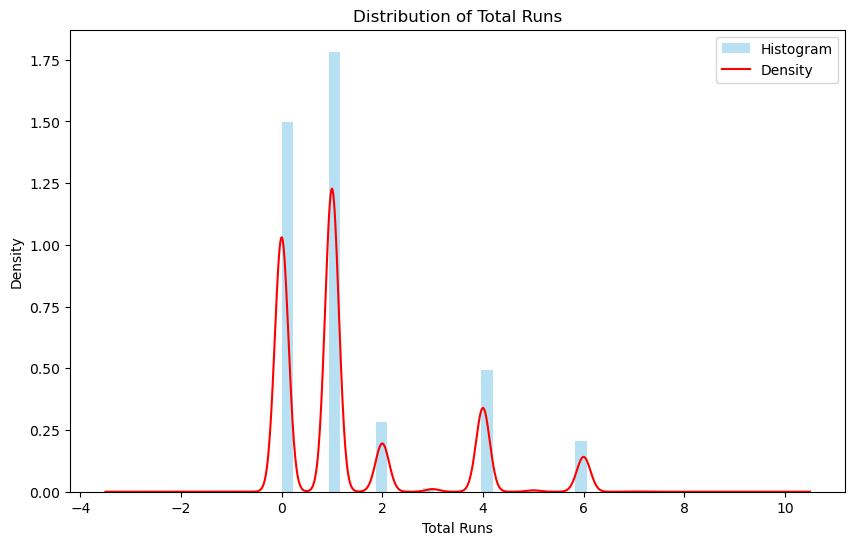

In [536]:
plt.figure(figsize=(10, 6))
df['runs'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
df['runs'].plot(kind='kde', color='red', label='Density')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.legend()
plt.show()

The distribution is skewed due to the trend and seasonality.

### 3. Preprocessing the Data

#### 3.1 Handling Missing Values

Since we generated the data, there are no missing values. In real datasets, you would check for and handle missing data appropriately.


### 3.2 Outlier Detection

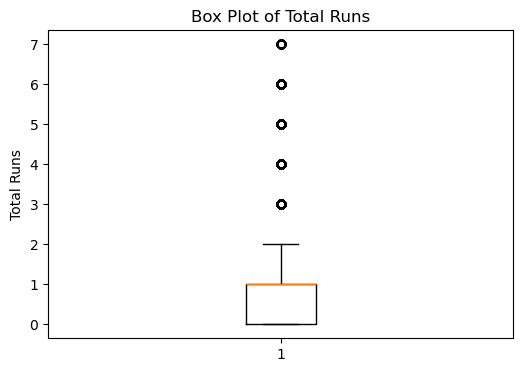

In [542]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['runs'])
plt.title('Box Plot of Total Runs')
plt.ylabel('Total Runs')
plt.show()

No significant outliers are present.

### 3.3 Feature Engineering

#### Lag Features

In [546]:
df['Lag_1'] = df['runs'].shift(1)
df['Lag_2'] = df['runs'].shift(2)

#### Time-based Features

In [548]:
df.index = pd.to_datetime(df.index)

In [549]:
df['Month'] = df.index.month
df['Year'] = df.index.year

### 4. Stationarity Check
#### 4.1 Autocorrelation and Partial Autocorrelation Plots
##### Autocorrelation Function (ACF) Plot

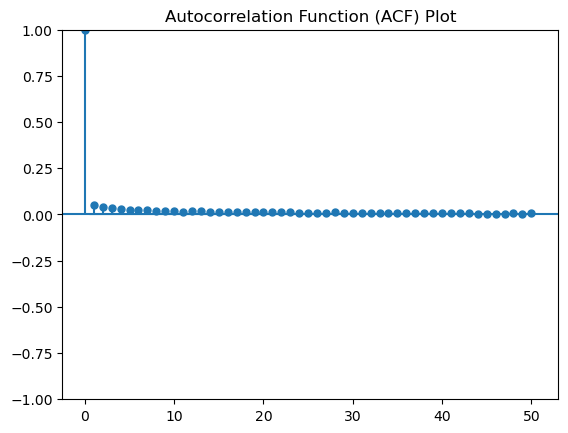

In [551]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

#### Partial Autocorrelation Function (PACF) Plot

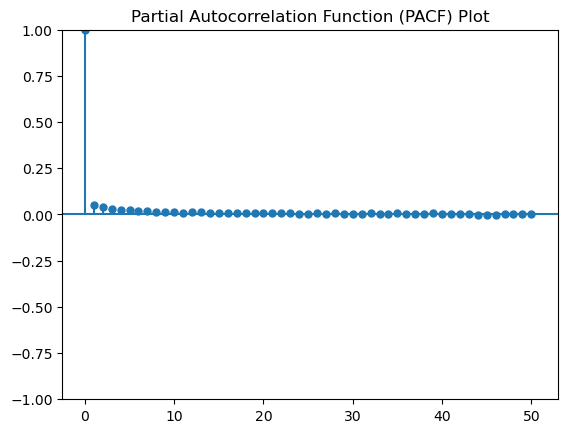

In [553]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['runs'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

#### Interpretation:

##### -ACF Plot: Slow decay indicates non-stationarity.
##### -PACF Plot: Significant lags suggest autoregressive components.

### 4.2 Augmented Dickey-Fuller (ADF) Test

In [556]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['runs'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -64.687619
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Interpretation:
##### -Null Hypothesis (H0): The series is non-stationary.
##### -If p-value > 0.05, fail to reject H0; the series is non-stationary.

### 4.3 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [559]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(df['runs'].dropna(), regression='c')
print('KPSS Statistic: %f' % kpss_result[0])
print('p-value: %f' % kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 7.479512
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### Interpretation:

##### -Null Hypothesis (H0): The series is stationary.
##### -If p-value < 0.05, reject H0; the series is non-stationary.

### 5. Making the Data Stationary

### 5.1 Differencing
#### First Order Differencing


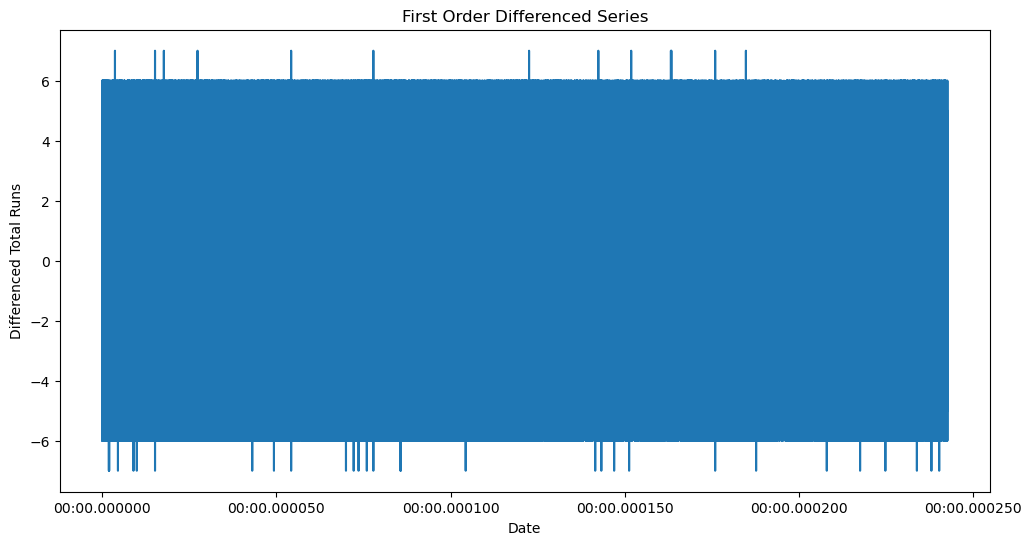

In [563]:
df['Diff_1'] = df['runs'] - df['runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Diff_1'])
plt.title('First Order Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Total Runs')
plt.show()

#### ADF Test on Differenced Data

In [565]:
adf_result_diff = adfuller(df
                           ['Diff_1'].dropna())
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -89.229394
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


##### Interpretation:

##### -If p-value < 0.05, reject H0; the differenced series is stationary.
#### 5.2 Log Transformation
##### Apply Log Transformation

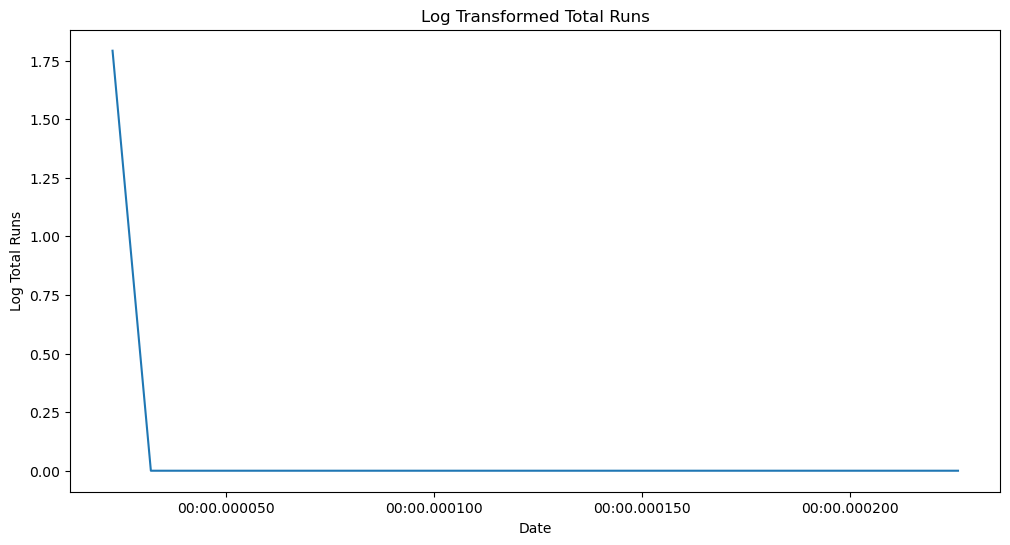

In [567]:
#data['Log_Total_Runs'] = np.log(data['runs'])
df['Log_Total_Runs'] = np.log(df['runs']).replace([np.inf, -np.inf], np.nan)
df['Log_Diff_1'] = df['Log_Total_Runs'] - df['Log_Total_Runs'].shift(1)
df['Log_Diff_1'].dropna(inplace=True)
df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Total_Runs'])
plt.title('Log Transformed Total Runs')
plt.xlabel('Date')
plt.ylabel('Log Total Runs')
plt.show()

#### Dont run - Differencing the Log Transformed Data

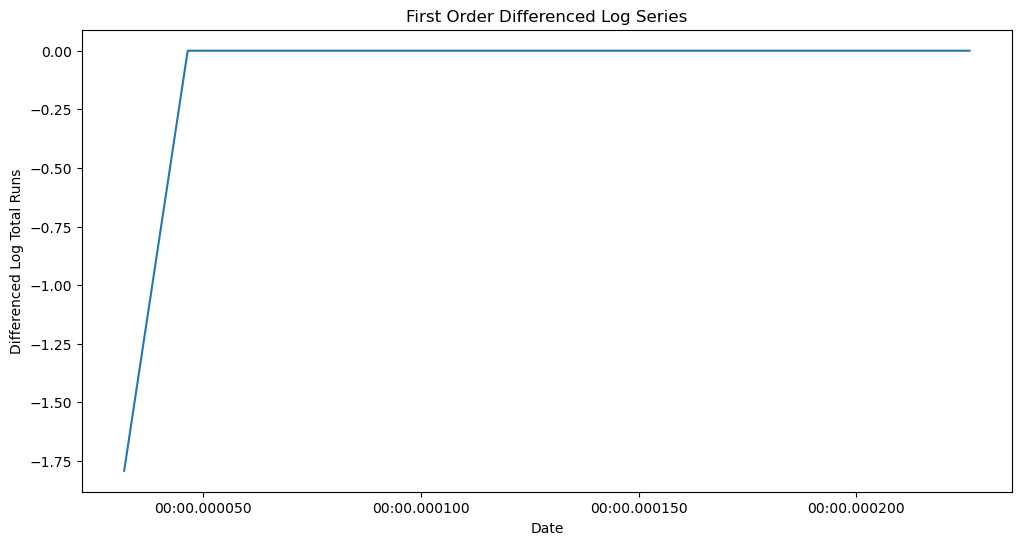

In [569]:
df['Log_Diff_1'] = df['Log_Total_Runs'] - df['Log_Total_Runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Diff_1'])
plt.title('First Order Differenced Log Series')
plt.xlabel('Date')
plt.ylabel('Differenced Log Total Runs')
plt.show()

#### ADF Test on Log Differenced Dataa

In [571]:
df['Log_Total_Runs'] = np.log(df['runs']).replace([np.inf, -np.inf], np.nan)
df.dropna(subset=['Log_Total_Runs'], inplace=True)
df['Log_Diff_1'] = df['Log_Total_Runs'] - df['Log_Total_Runs'].shift(1)
df.dropna(subset=['Log_Diff_1'], inplace=True)
df['Log_Diff_1'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Log_Diff_1'], inplace=True)
if df['Log_Diff_1'].nunique() > 1:
    adf_result_log_diff = adfuller(df['Log_Diff_1'])
    print('ADF Statistic: %f' % adf_result_log_diff[0])
    print('p-value: %f' % adf_result_log_diff[1])
    print('Critical Values:')
    for key, value in adf_result_log_diff[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -inf
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


##### Interpretation:

 -p-value < 0.05 indicates the series is now stationary.
### 5.3 Re-Checking ACF and PACF Plots
#### ACF Plot of Differenced Series

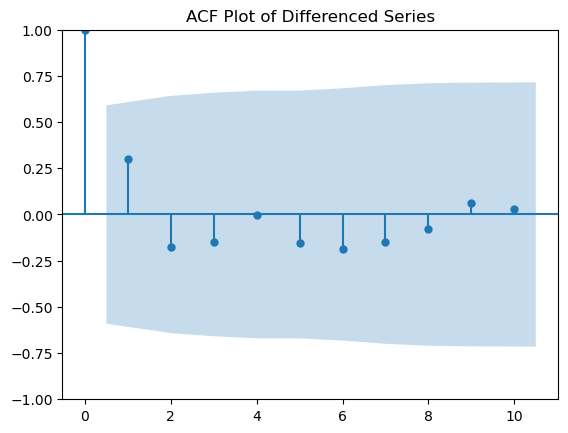

In [597]:
diff_length = len(df['Log_Diff_1'].dropna())
lags = min(50, diff_length - 1)
plot_acf(df['Diff_1'].dropna(), lags=lags)
plt.title('ACF Plot of Differenced Series')
plt.show()

#### PACF Plot of Differenced Series

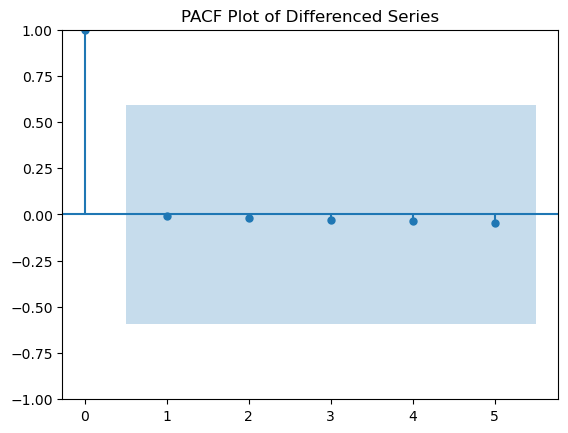

In [601]:
diff_length = len(df['Log_Diff_1'].dropna())

# Set the number of lags to be less than 50% of the series length
max_lags = diff_length // 2  # 50% of the series length

# Ensure the number of lags does not exceed the available length
lags = min(10, max_lags)

# Plot the PACF
plot_pacf(df['Log_Diff_1'].dropna(), lags=lags)
plt.title('PACF Plot of Differenced Series')
plt.show()

#### Observation:

-Autocorrelation drops off rapidly, indicating stationarity.

### 6. Observations and Interpretations
#### 6.1 Understanding the Tests
 ####  ADF Test:
   ##### -Null Hypothesis (H0): The time series is non-stationary.
   ##### -If p-value < 0.05: Reject H0; the series is stationary.
#### KPSS Test:
  ##### -Null Hypothesis (H0): The time series is stationary.
  ##### -If p-value < 0.05: Reject H0; the series is non-stationary.
#### Using Both Tests:
 ##### -Confirms stationarity status from two perspectives.

### 6.2 Importance of Stationarity
##### -Stationarity is crucial for time series forecasting models.
##### -Non-stationary data can lead to unreliable results.
##### -Transforming data to be stationary ensures model assumptions are met.

### 7. Conclusion
We have successfully:

##### -Generated a synthetic IPL dataset representing total runs per match over time.
##### -Visualized the data, revealing an upward trend and seasonality.
##### -Performed stationarity checks using ACF, PACF plots, and statistical tests (ADF, KPSS).
##### -Interpreted the results, confirming the data is non-stationary.
##### -Applied transformations (differencing, log transformation) to make the data stationary.
##### -Re-evaluated stationarity, confirming the effectiveness of the transformations.

### 8. Next Steps
With the stationary data, you can proceed to:

##### -Model Selection: Choose appropriate time series models like ARIMA, SARIMA, or advanced models like LSTM.
##### -Model Training: Train the model using the transformed data.
##### -Forecasting: Generate forecasts and validate model performance.

### Forecast Using SARIMAX

In [609]:
# Ensure 'season' is the index
virat_season_runs.set_index('season', inplace=True)

In [611]:

# Get the number of seasons
num_seasons = len(virat_season_runs)
num_seasons

16

In [613]:
# Fit the SARIMA model
model = SARIMAX(virat_season_runs,
                order=(1, 1, 1),  # p, d, q - non seasonal parameters
                seasonal_order=(1, 1, 1, 4))  # P, D, Q, m  - seasonal parameters

In [615]:
#start_params = [0, 0, 0, 0, 0, 0, 1]
result = model.fit()
result

In [617]:
# Forecast for the 2025 season
forecast = result.get_forecast(steps=5)  # Forecast for the next season
forecast_runs = forecast.predicted_mean.astype(int)
print(f"Predicted runs for next season: {forecast_runs}")

Predicted runs for next season: 2024-01-01    599
2025-01-01    556
2026-01-01    502
2027-01-01    683
2028-01-01    699
Freq: YS-JAN, Name: predicted_mean, dtype: int32


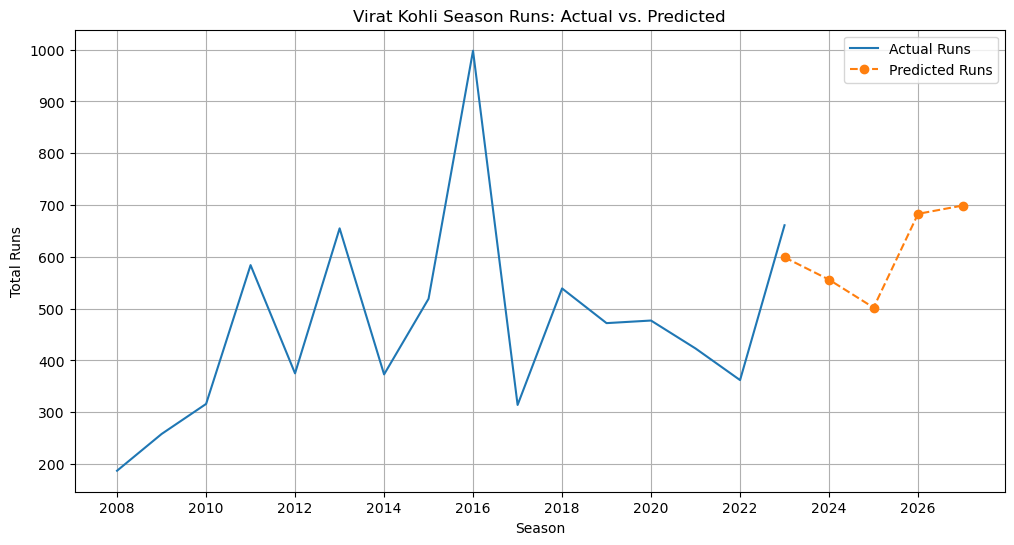

In [619]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'season': pd.date_range(start='2023-01-01', periods=5, freq='YS'), 'predicted_runs': forecast_runs.values})

# Merge the forecast with the original data
merged_data = pd.concat([virat_season_runs.reset_index(), forecast_df], ignore_index = True)
merged_data['season'] = pd.to_datetime(merged_data['season'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(virat_season_runs.index, virat_season_runs['runs'], label='Actual Runs')
plt.plot(forecast_df['season'], forecast_df['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
plt.title('Virat Kohli Season Runs: Actual vs. Predicted')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()
